In [62]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cbook import mplDeprecation
from scipy.spatial.distance import cdist
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore",category=mplDeprecation)

In [2]:
df = pd.read_csv("../data/genres_v2.csv", dtype={"song_name":"object"})

In [20]:
pd.options.display.max_columns=None
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
danceability        42305 non-null float64
energy              42305 non-null float64
key                 42305 non-null int64
loudness            42305 non-null float64
mode                42305 non-null int64
speechiness         42305 non-null float64
acousticness        42305 non-null float64
instrumentalness    42305 non-null float64
liveness            42305 non-null float64
valence             42305 non-null float64
tempo               42305 non-null float64
type                42305 non-null object
id                  42305 non-null object
uri                 42305 non-null object
track_href          42305 non-null object
analysis_url        42305 non-null object
duration_ms         42305 non-null int64
time_signature      42305 non-null int64
genre               42305 non-null object
song_name           21519 non-null object
Unnamed: 0          20780 non-null float64
tit

In [5]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [6]:
data = df.drop(["song_name", "Unnamed: 0", "title", "type", "id", "track_href", "uri", "analysis_url"], axis=1)

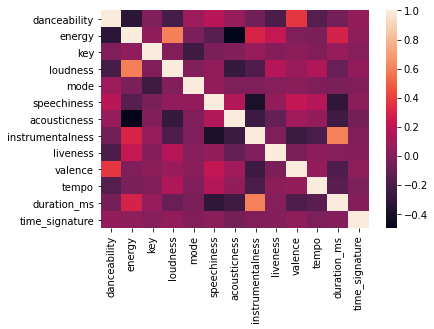

In [7]:
sns.heatmap(data.corr())

In [8]:
genre_data = data.groupby('genre')
mean_genre_data = genre_data.mean()
mean_genre_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,187707.330275,3.961337
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,3.938690
Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479,227954.272787,3.975561
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,211392.828633,3.984816
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,3.960934
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,147195.234151,3.953476
Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521,176152.595234,3.979915
dnb,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,286548.825017,3.998314


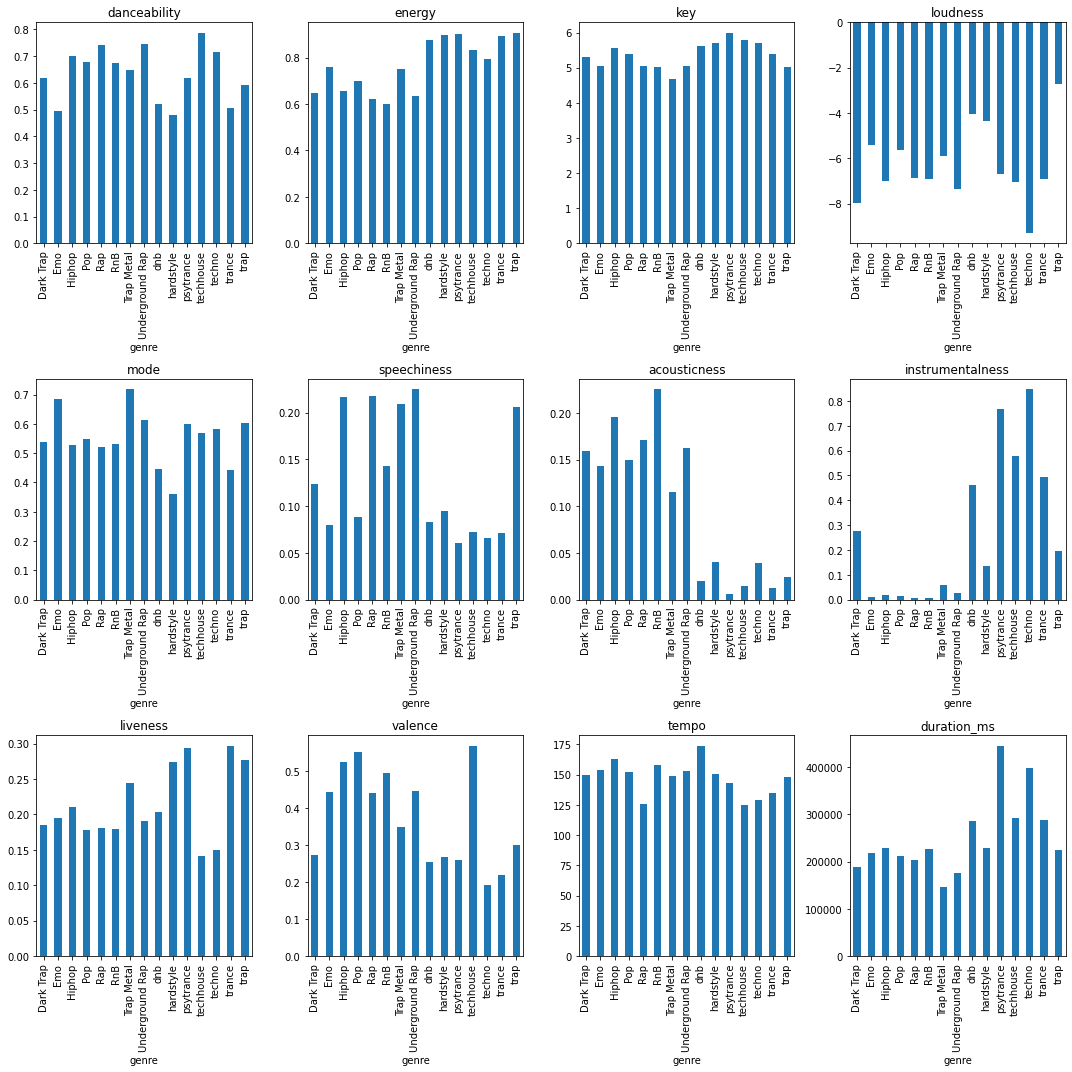

In [9]:
fig, ax = plt.subplots(3, 4, figsize=(15, 15))

i = 0
for feature in mean_genre_data:
    if feature!="time_signature":
        bp = mean_genre_data[feature].plot(ax=ax[i//4, i%4], kind='bar')
        ax[i//4, i%4].set_title(feature)
        i+=1

plt.tight_layout()
plt.show()

In [10]:
featured_data = data[["speechiness", "valence", "instrumentalness", "acousticness", "liveness"]]

sc = StandardScaler()
sc_data = pd.DataFrame(sc.fit_transform(featured_data), columns=featured_data.columns)

# Note: No changes in # of dimensions after PCA transformation.
pca = PCA(0.95)
pca_data = pca.fit_transform(sc_data) 

print("PCA explained variance ratio:", pca.explained_variance_ratio_)

x_train, x_test = train_test_split(pca_data, test_size=0.2, random_state=5)

print(pca_data.shape)

PCA explained variance ratio: [0.34333162 0.21409302 0.17576951 0.14851193 0.11829392]
(42305, 5)


In [11]:
distortions = [] 
inertias = [] 
silhouettes = []
silhouette_samples = []
k_options = range(2,11)

print("Calculating distortions, inertias, and silhouette data...")

for k in k_options:
    kmeans = KMeans(n_clusters=k, n_init=4)
    kmeans.fit(x_train)
    distortions.append(sum(np.min(cdist(x_train, kmeans.cluster_centers_, "euclidean"),axis=1)) / x_train.shape[0]) 
    inertias.append(kmeans.inertia_) 
    y_pred = kmeans.predict(x_test)
    silhouettes.append({
        "avg": metrics.silhouette_score(x_test, y_pred), 
        "samples": metrics.silhouette_samples(x_test, y_pred), 
        "k":k
    })
    
print("Done.")

Calculating distortions, inertias, and silhouette data...
Done.


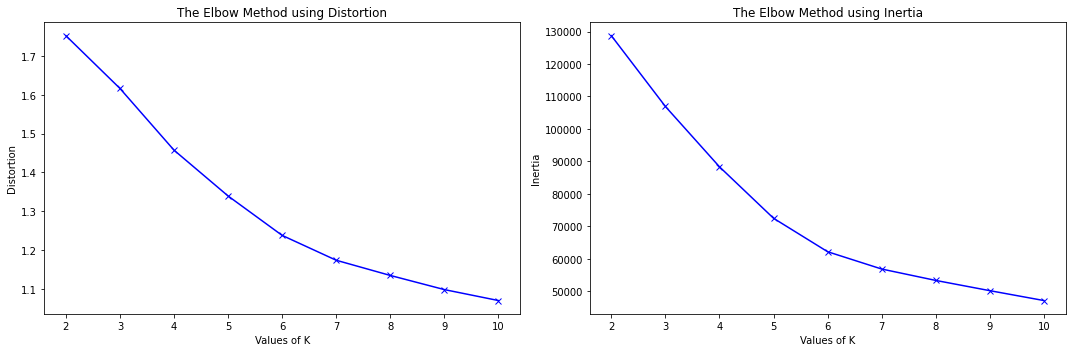

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(k_options, distortions, 'bx-') 
ax[0].set_xlabel("Values of K")
ax[0].set_ylabel("Distortion")
ax[0].set_title("The Elbow Method using Distortion")

ax[1].plot(k_options, inertias, 'bx-') 
ax[1].set_xlabel("Values of K")
ax[1].set_ylabel("Inertia")
ax[1].set_title("The Elbow Method using Inertia")

plt.tight_layout()
plt.show() 

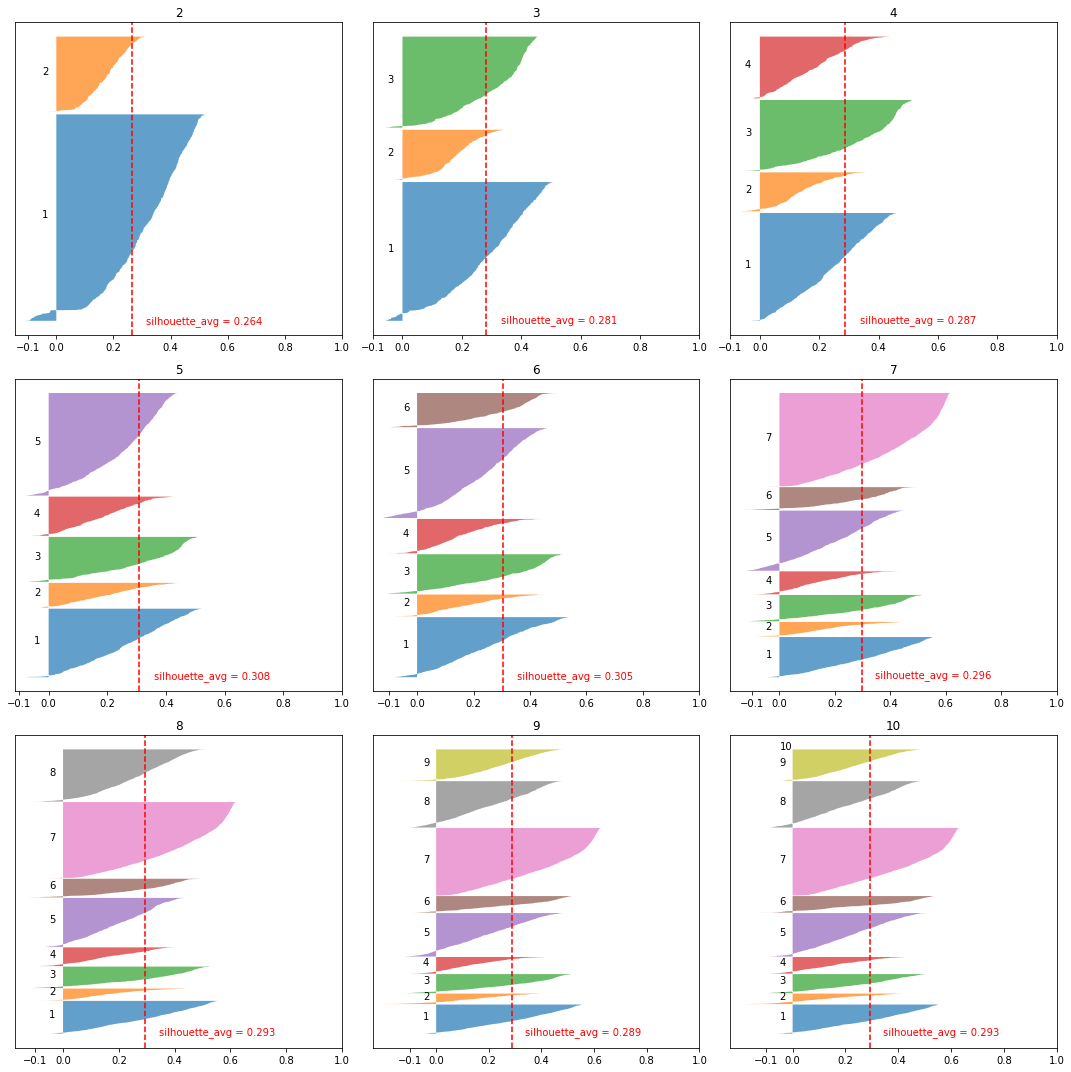

In [13]:
fig, ax = plt.subplots(3,3, figsize=(15, 15))

for i, silhouette in enumerate(silhouettes):
    y_lower = 10
    for j in range(silhouette["k"]):
        j += 1
        cluster_silhouette_values = silhouette["samples"][y_pred == j]
        cluster_silhouette_values.sort()
        cluster_size = cluster_silhouette_values.shape[0]
        y_upper = y_lower + cluster_size
        ax[i//3, i%3].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
        ax[i//3, i%3].text(-0.05, y_lower + 0.5 * cluster_size, str(j))
        y_lower = y_upper + 10
    
    silhouette_avg_text = "silhouette_avg = " + "{:.3f}".format(silhouette["avg"])
    ax[i//3, i%3].text(silhouette["avg"] + 0.05, 0.5, silhouette_avg_text, color="red")   
    ax[i//3, i%3].axvline(x=silhouette["avg"], color="red", linestyle="--")
    ax[i//3, i%3].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i//3, i%3].set_yticks([]) 
    ax[i//3, i%3].set_title(silhouette["k"])
 
plt.tight_layout()
plt.show()

In [14]:
N_CLUSTERS = 5

Text(0, 0.5, 'inertia')

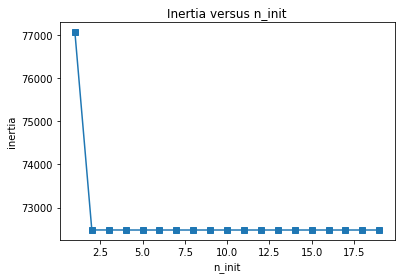

In [15]:
inertia = []

for n in range(1, 20):
    kmeans = KMeans(init = "k-means++", n_clusters=N_CLUSTERS, n_init = n, random_state=1)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 20), inertia, marker='s')
plt.title("Inertia versus n_init")
plt.xlabel("n_init")
plt.ylabel("inertia")

In [16]:
N_INIT = 2

In [35]:
kmeans = KMeans(init="k-means++", n_clusters=N_CLUSTERS, n_init=N_INIT)
kmeans.fit(x_train)
y_pred = kmeans.predict(x_test)

In [34]:
print("Inertia:", kmeans.inertia_)
print("Silhouette:", metrics.silhouette_score(x_test, y_pred))

print(y_pred.shape)

Inertia: 72478.90896918769
Silhouette: 0.308447144116785
(8461,)


In [68]:
plot_data = pd.DataFrame(np.c_[x_test, y_pred])

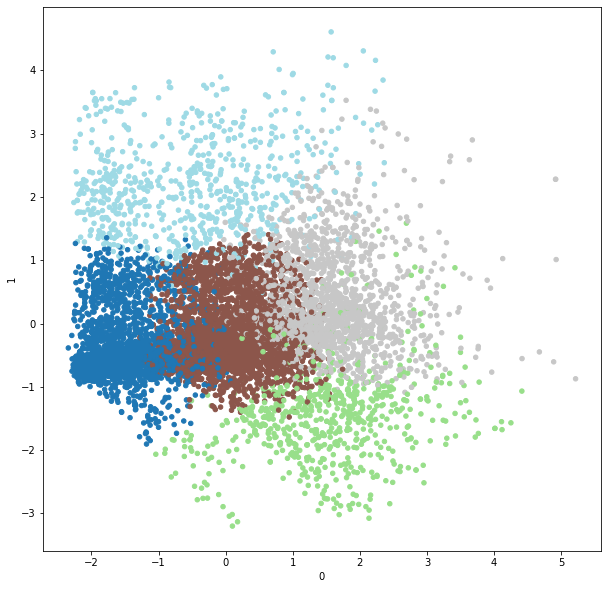

In [70]:
cmap = cm.get_cmap("tab20")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_data = pd.DataFrame(np.c_[x_test, y_pred])
plot_data.plot.scatter(x=0, y=1, c=5, cmap=cmap, colorbar=False, ax=ax)

plt.show()